In [1]:
#Import necessary libraries
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For mathematical operations and working with arrays
import matplotlib.pyplot as plt  #For basic plotting and visualization
import seaborn as sns  #For advanced data visualization
from sklearn.preprocessing import LabelEncoder  #To convert categorical data into numeric form
from sklearn.model_selection import train_test_split  #To split the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier  #Decision Tree algorithm for classification tasks
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  #For evaluating model performance
from sklearn import tree  #For visualizing and working with decision trees
from sklearn.naive_bayes import GaussianNB  #Naive Bayes algorithm for classification

In [2]:
#URL of the dataset (in this case, a CSV file hosted on GitHub)
url = 'https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/breast-cancer.csv'

#Reading the dataset into a pandas DataFrame
df = pd.read_csv(url)

#Display 10 random sample rows from the dataset to check the data
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
36,854268,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.055980,...,15.89,30.36,116.20,799.6,0.14460,0.4238,0.51860,0.14470,0.3591,0.10140
262,888570,M,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.075070,...,20.39,27.24,137.90,1295.0,0.11340,0.2867,0.22980,0.15280,0.3067,0.07484
217,8811779,B,10.20,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.010710,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
188,874662,B,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.015530,...,12.57,26.48,79.57,489.5,0.13560,0.1000,0.08803,0.04306,0.3200,0.06576
19,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.11,19.26,99.70,711.2,0.14400,0.1773,0.23900,0.12880,0.2977,0.07259
203,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.091760,...,19.20,41.85,128.50,1153.0,0.22260,0.5209,0.46460,0.20130,0.4432,0.10860
79,8610908,B,12.86,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.023150,...,14.24,24.82,91.88,622.1,0.12890,0.2141,0.17310,0.07926,0.2779,0.07918
411,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,...,12.41,26.44,79.93,471.4,0.13690,0.1482,0.10670,0.07431,0.2998,0.07881
398,904302,B,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,...,12.68,20.35,80.79,496.7,0.11200,0.1879,0.20790,0.05556,0.2590,0.09158
304,89296,B,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.015020,...,12.68,21.61,82.69,489.8,0.11440,0.1789,0.12260,0.05509,0.2208,0.07638


In [3]:
print(df.info()) #used to display a summary of information about a DataFrame structure, including the number of rows, columns, data types, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe() #used to generate descriptive statistics (such as mean, median, standard deviation, and quartiles) for numerical columns in a DataFrame

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<ipython-input-6-11c0e5dbd2d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


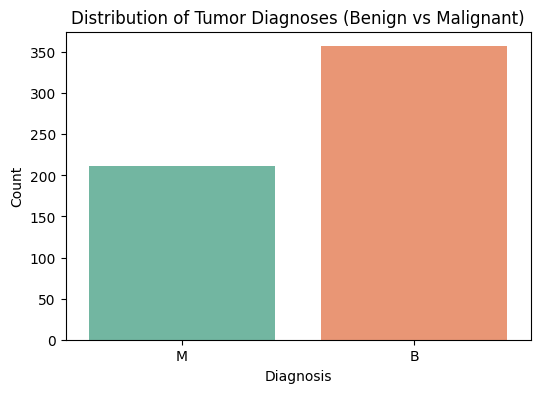

The bar chart shows the distribution of benign (B) and malignant (M) diagnoses in the dataset. This visualization helps us understand the overall balance between the two categories, with malignant cases being slightly less frequent than benign ones.


In [6]:
#Visualization 1
#Set the figure size for the plot
plt.figure(figsize=(6, 4))

#Create a count plot to show the number of benign and malignant diagnoses
sns.countplot(x='diagnosis', data=df, palette='Set2')

#Set the title of the plot to describe the data being shown
plt.title('Distribution of Tumor Diagnoses (Benign vs Malignant)')

#Label the x-axis as 'Diagnosis'
plt.xlabel('Diagnosis')

#Label the y-axis as 'Count'
plt.ylabel('Count')

#Display the plot
plt.show()

print ("The bar chart shows the distribution of benign (B) and malignant (M) diagnoses in the dataset. This visualization helps us understand the overall balance between the two categories, with malignant cases being slightly less frequent than benign ones.")

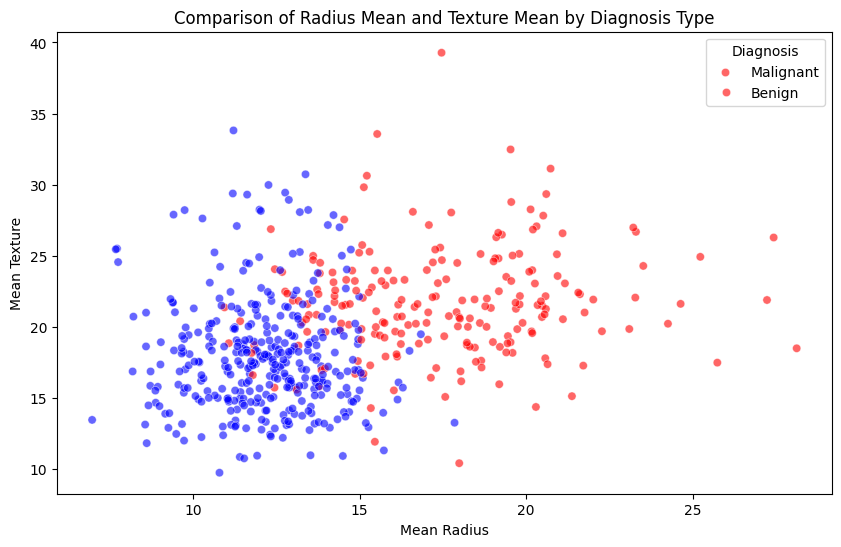

This scatterplot compares the mean radius and texture of breast cancer tumors, distinguishing between malignant (red) and benign (blue) diagnoses. The separation between the two diagnosis types indicates that higher mean radius and texture values are often associated with malignant tumors, which can help in visual pattern recognition and potentially aid in classification efforts for tumor diagnosis.


In [7]:
#Visualization 2
#Set the figure size for the scatter plot
plt.figure(figsize=(10, 6))

#Create a scatter plot comparing mean radius and mean texture, with points colored by diagnosis type
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis',
                palette={'M': 'red', 'B': 'blue'}, alpha=0.6)

#Set the title to describe the plot’s purpose
plt.title("Comparison of Radius Mean and Texture Mean by Diagnosis Type")

#Label the x-axis as 'Mean Radius'
plt.xlabel("Mean Radius")

#Label the y-axis as 'Mean Texture'
plt.ylabel("Mean Texture")

#Create a legend with the title 'Diagnosis' and custom labels for each diagnosis type
plt.legend(title="Diagnosis", labels=["Malignant", "Benign"])

#Display the plot
plt.show()

print("This scatterplot compares the mean radius and texture of breast cancer tumors, distinguishing between malignant (red) and benign (blue) diagnoses. The separation between the two diagnosis types indicates that higher mean radius and texture values are often associated with malignant tumors, which can help in visual pattern recognition and potentially aid in classification efforts for tumor diagnosis.")

In [39]:
label_encoder = LabelEncoder()  #Create a LabelEncoder object from scikit-learn to convert categorical data into numeric values
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  #Apply Label Encoding to the 'diagnosis' column
df.head()  #Display the top 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


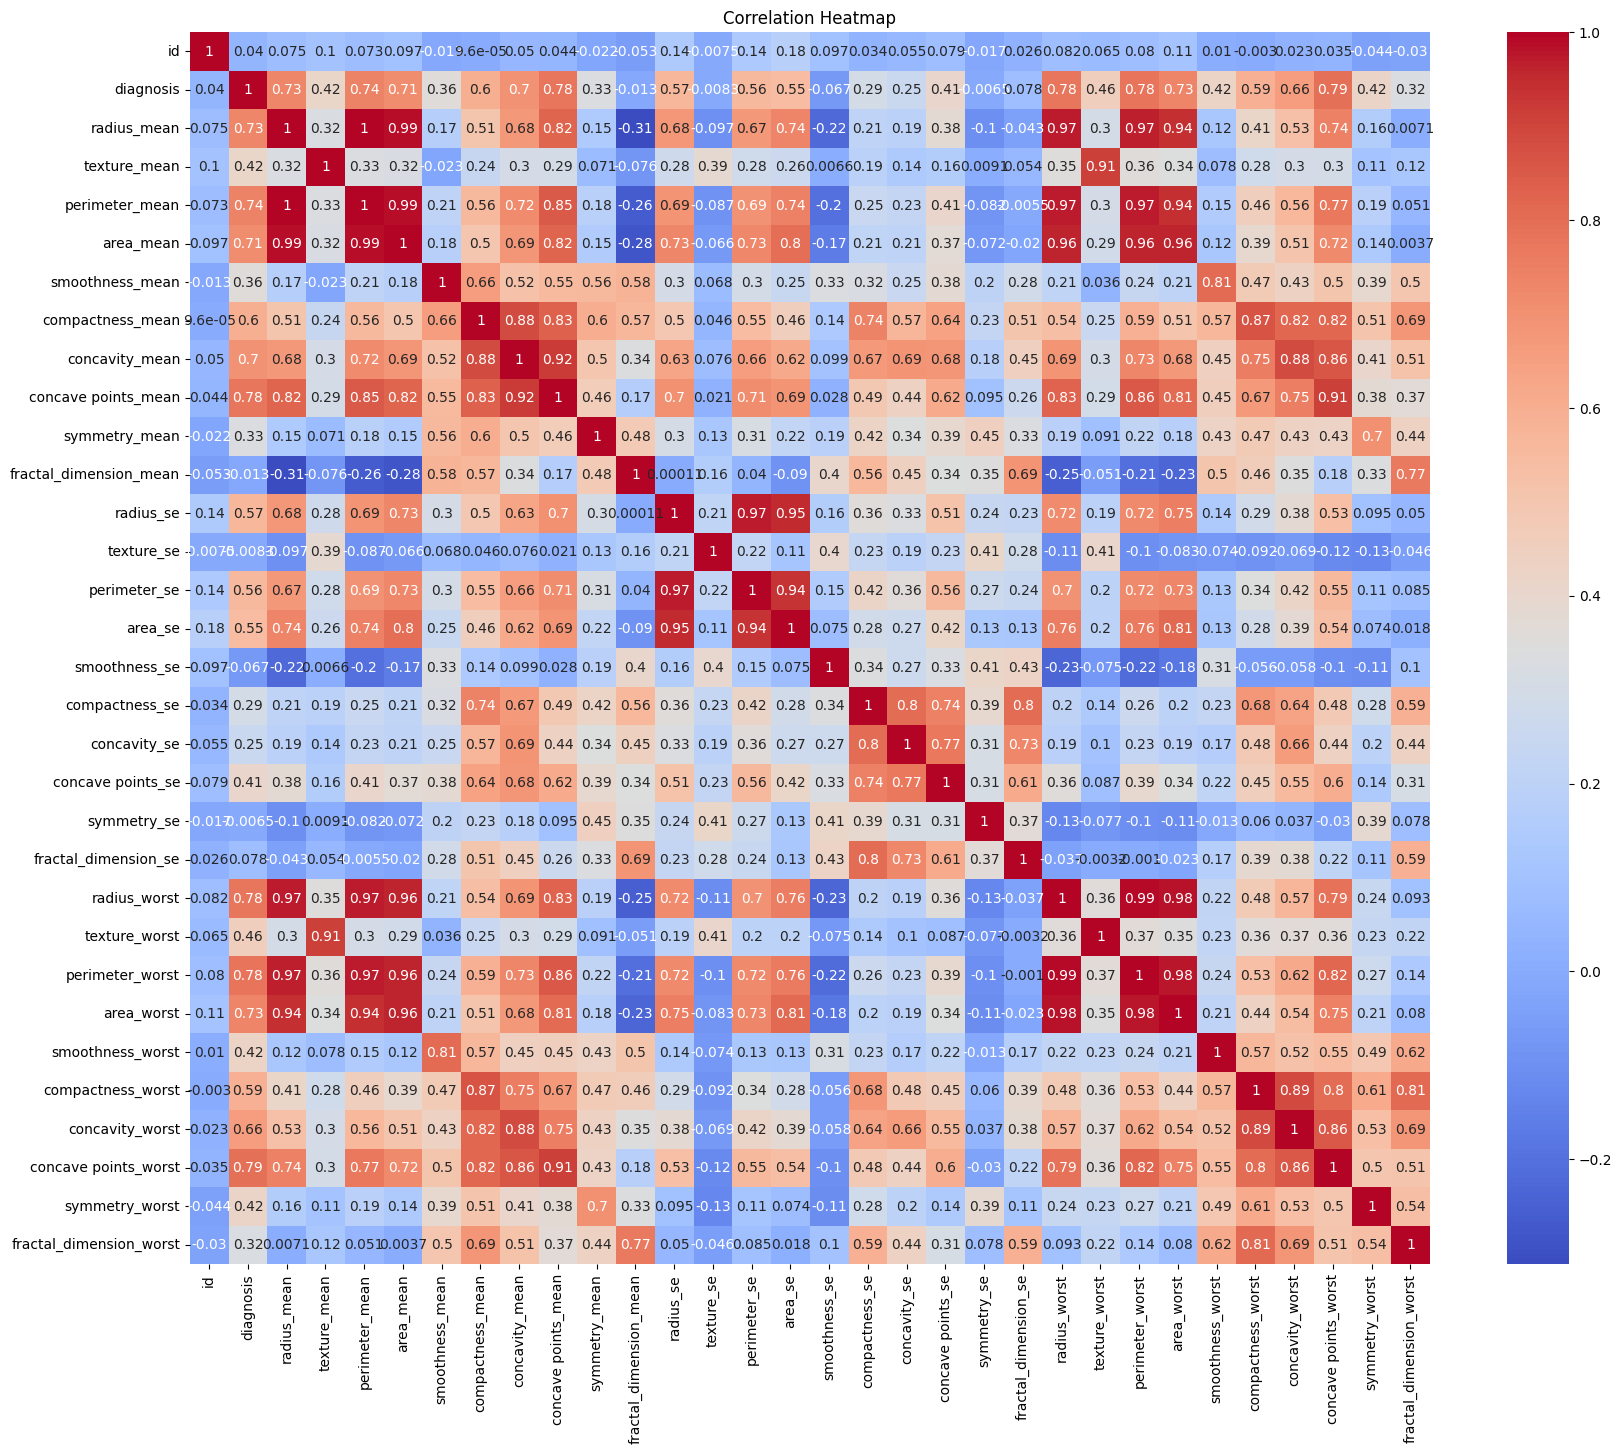

In [40]:
#Calculate the correlation matrix
corr_matrix = df.corr()

#Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#Add the title
plt.title('Correlation Heatmap')
plt.show()

#The heatmap displayed above shows the correlation between various features in the breast cancer dataset, with correlation values ranging from -1 to 1.
#Strong positive correlations (close to 1) are shown in dark red, while strong negative correlations (close to -1) are shown in dark blue.

In [41]:
X = df.drop(['diagnosis'], axis=1) #Create a variable X that contains all columns from the DataFrame df, except for the 'diagnosis' column
y = df['diagnosis'] #Create a variable y that contains the 'diagnosis' column from the DataFrame df

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#To split the dataset into two parts: for training (80%) and for testing (20%).

In [43]:
#3
X_train.shape, X_test.shape #To show the number of rows and columns

((455, 31), (114, 31))

In [44]:
#Criterion Entropy
#instantiate the DecisionTreeClassifier model with criterion entropy
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#fit the model
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [45]:
#Use the trained decision tree classifier 'dt_en' to predict the labels for the test data 'X_test'
#The predictions will be stored in the variable 'y_pred_en'
y_pred_en = dt_en.predict(X_test)

In [46]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #Print the accuracy result

Model accuracy score with criterion entropy: 0.9649


In [47]:
#Predict on the training set and calculate accuracy
#The model makes predictions on the training set 'X_train' and stores them in 'y_train_pred'
y_train_pred = dt_en.predict(X_train)

#Calculate the accuracy on the training set by comparing predicted labels to actual labels
train_accuracy = accuracy_score(y_train, y_train_pred)

#Predict on the test set and calculate accuracy
#The model makes predictions on the test set 'X_test' and stores them in 'y_test_pred'
y_test_pred = dt_en.predict(X_test)

#Calculate the accuracy on the test set by comparing predicted labels to actual labels
test_accuracy = accuracy_score(y_test, y_test_pred)

#Print out the training and test accuracy with 4 decimal places
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

#Evaluate whether the model is overfitting or underfitting based on training and test accuracy
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")  # Higher training accuracy suggests overfitting
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")  # Equal accuracies suggest a good fit
else:
    print("The model might be underfitting.")  # Higher test accuracy suggests underfitting


Training accuracy: 0.9802
Test accuracy: 0.9649
The model might be overfitting.


[Text(0.5769230769230769, 0.875, 'x[8] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3076923076923077, 0.625, 'x[21] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [266, 16]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[14] <= 48.7\nentropy = 0.136\nsamples = 263\nvalue = [258, 5]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [257, 3]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8461538461538461, 0.625, 'x[23] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[22] <= 25.655\nentropy = 0.994

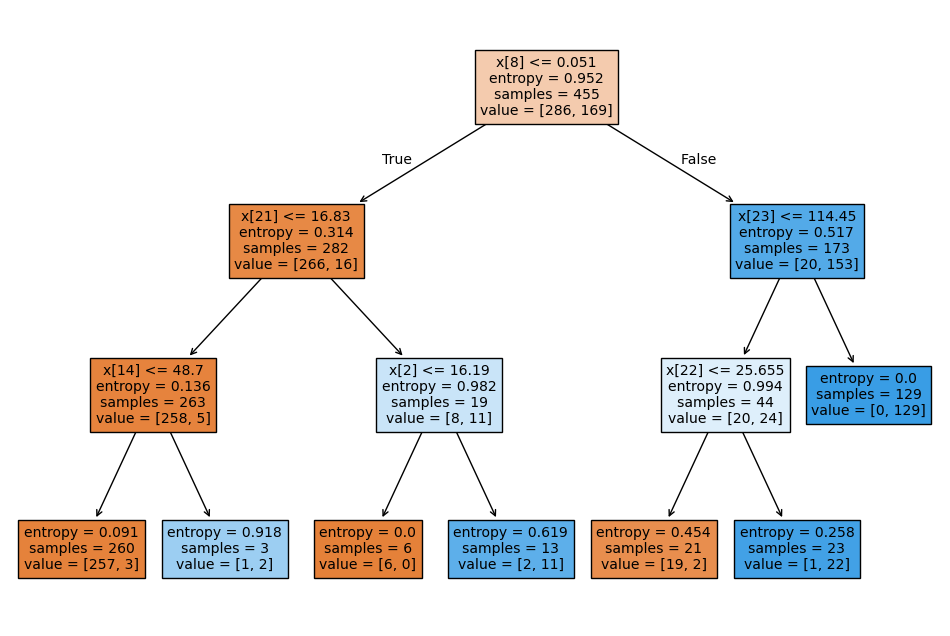

In [48]:
#Set the size of the plot to 12x8 inches for better visibility
plt.figure(figsize=(12, 8))

#Fit the decision tree model 'dt_en' to the training data 'X_train' and 'y_train'
#Then, plot the decision tree using the fitted model
#'filled=True' fills the nodes with colors based on the class labels
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)

In [49]:
#Criterion Gini
#instantiate the DecisionTreeClassifier model with criterion gini index
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

#fit the model
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [50]:
#Use the trained decision tree classifier 'dt_gini' to predict the labels for the test data 'X_test'
#The predictions will be stored in the variable 'y_pred_gini'
y_pred_gini = dt_gini.predict(X_test)

In [51]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #To print the accuracy result

Model accuracy score with criterion gini: 0.9474


In [52]:
#Predict on the training set and calculate accuracy
#The model makes predictions on the training set 'X_train' and stores them in 'y_train_pred'
y_train_pred = dt_gini.predict(X_train)

#Calculate the accuracy on the training set by comparing predicted labels to actual labels
train_accuracy = accuracy_score(y_train, y_train_pred)

#Predict on the test set and calculate accuracy
#The model makes predictions on the test set 'X_test' and stores them in 'y_test_pred'
y_test_pred = dt_gini.predict(X_test)

#Calculate the accuracy on the test set by comparing predicted labels to actual labels
test_accuracy = accuracy_score(y_test, y_test_pred)

#Print out the training and test accuracy with 4 decimal places
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

#Evaluate whether the model is overfitting or underfitting based on training and test accuracy
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")  # Higher training accuracy suggests overfitting
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")  # Equal accuracies suggest a good fit
else:
    print("The model might be underfitting.")  # Higher test accuracy suggests underfitting

Training accuracy: 0.9780
Test accuracy: 0.9474
The model might be overfitting.


[Text(0.5, 0.875, 'x[8] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[21] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[2] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'x[28] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[23] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'x[

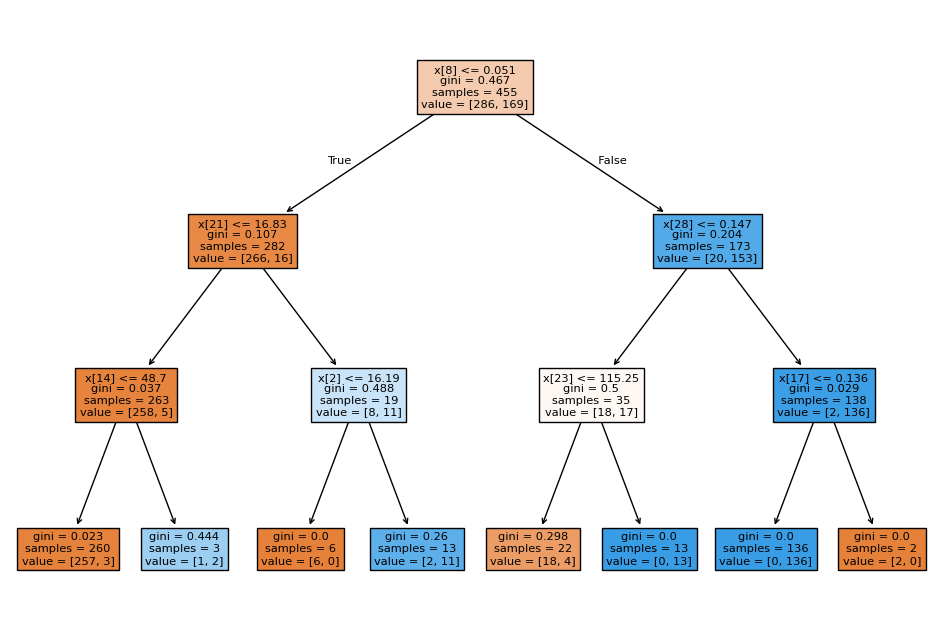

In [53]:
#Set the size of the plot to 12x8 inches for better visibility
plt.figure(figsize=(12, 8))

#Fit the decision tree model 'dt_gini' to the training data 'X_train' and 'y_train'
#Then, plot the decision tree using the fitted model
#'filled=True' fills the nodes with colors based on the class labels
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)  #Create and display the tree

In [54]:
#Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

#Create the confusion matrix for predictions made by the decision tree using entropy
cm = confusion_matrix(y_test, y_pred_en)  # Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Entropy-based Tree:\n", cm)

#Create the confusion matrix for predictions made by the decision tree using Gini Index
cm = confusion_matrix(y_test, y_pred_gini)  # Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Gini-based Tree:\n", cm)

Confusion Matrix for Entropy-based Tree:
 [[71  0]
 [ 4 39]]
Confusion Matrix for Gini-based Tree:
 [[69  2]
 [ 4 39]]


In [56]:
print(classification_report(y_test, y_pred_en)) #To create and print the classification report
print(classification_report(y_test, y_pred_gini)) #To create and print the classification report

#Conclusion
#Both models show good performance in classifying breast cancer based on the available columns, both for the training set and the test set. However, if we look at the model with the entropy criterion, it provides more accurate results compared to the Gini criterion.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [57]:
# Naive Bayes
nb_classifier = GaussianNB() #To instantiate a Gaussian Naive Bayes object from the scikit-learn library.
nb_classifier.fit(X_train, y_train) #To train the created Naive Bayes model with the feature data X_train and label y_train.

GaussianNB()

In [58]:
nb_y_pred = nb_classifier.predict(X_test) #To predict the labels using the previously trained Naive Bayes model.

In [59]:
#Create the confusion matrix for the Naive Bayes model predictions
cm = confusion_matrix(y_test, nb_y_pred)  #Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Naive Bayes:\n", cm)

#Display the accuracy score for the Naive Bayes model
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))  #Show the accuracy result

Confusion Matrix for Naive Bayes:
 [[70  1]
 [43  0]]
Accuracy Score: 0.6140


In [61]:
print(classification_report(y_test, nb_y_pred)) #To print the classification report

#Conclusion
#Based on the results obtained, the accuracy of this Naive Bayes model can be considered inadequate for use, as it achieved an Accuracy Score of 0.6140. This means that the Naive Bayes model is not well-suited for detecting breast cancer.

              precision    recall  f1-score   support

           0       0.62      0.99      0.76        71
           1       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



In [62]:
#Logistic Regression

#Import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

#Create an instance of the Logistic Regression classifier
#'max_iter=200' sets the maximum number of iterations for the solver to converge
classifier = LogisticRegression(max_iter=200)

#Fit the logistic regression model to the training data
#The model learns the relationship between the features in 'X_train' and the target labels in 'y_train'
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [63]:
#Use the trained logistic regression classifier to predict the labels for the test data 'X_test'
y_pred_log = classifier.predict(X_test)

#Create a comparison table to show actual vs predicted labels
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})

#Display the first few rows of the comparison table
print(comparison_table.head())

     y_test  y_pred
204       0       0
70        1       1
131       1       1
431       0       0
540       0       0


In [64]:
#Calculate and print the accuracy score of the logistic regression model
#This compares the actual test labels 'y_test' with the predicted labels 'y_pred_log'
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

Accuracy Score: 0.9561


In [65]:
#Create the confusion matrix for the logistic regression model predictions
cmatrix = confusion_matrix(y_test, y_pred_log)  # Calculate confusion matrix based on test labels and predicted labels

#Print the confusion matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [67]:
#Print the classification report for the logistic regression model predictions
#This report includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred_log))

#Conclusion
#The Logistic Regression shows an Accuracy Score of 0.9561, which means it's above 90%. This indicates that this Logistic Regression model is suitable for detecting breast cancer.

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [68]:
#KNN
#Importing the KNeighborsClassifier from the sklearn library
from sklearn.neighbors import KNeighborsClassifier

#Creating a KNN model with 5 nearest neighbors and using the Euclidean distance metric
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

#Training the KNN model using the training data (X_train) and the corresponding labels (y_train)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [69]:
y_pred = classifier.predict(X_test) #Making predictions (y_pred) from the classification model using the test data (X_test)

In [70]:
#Creating a DataFrame to compare y_test and y_pred side by side
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

#Resetting the index of the DataFrame and dropping the old index
comparison_table = comparison_table.reset_index(drop=True)

#Displaying the first few rows of the comparison table
comparison_table.head()

,y_test,y_pred
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [71]:
#Check accuracy score
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred))) #To print the accuracy result

Accuracy Score: 0.7544


In [73]:
#Confusion matrix
#Importing the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

#Calculating the confusion matrix based on the true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

#Displaying the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[63  8]
 [20 23]]


In [74]:
#Importing the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

#Printing the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))  # To print the classification report

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114



In [75]:
print ("The KNN model achieves a fairly good score in detecting breast cancer. From this data, the model accuracy score with the Gini criterion is 0.9474, the model accuracy score with the entropy criterion is 0.9649, the Naive Bayes model is 0.6140, the Logistic Regression model is 0.9561, and the KNN model is 0.7544. Therefore, for breast cancer predictions, it is recommended to use 1. Entropy, 2. Logistic Regression, 3. Gini, 4. KNN, and 5. Naive Bayes.")

The KNN model achieves a fairly good score in detecting breast cancer. From this data, the model accuracy score with the Gini criterion is 0.9474, the model accuracy score with the entropy criterion is 0.9649, the Naive Bayes model is 0.6140, the Logistic Regression model is 0.9561, and the KNN model is 0.7544. Therefore, for breast cancer predictions, it is recommended to use 1. Entropy, 2. Logistic Regression, 3. Gini, 4. KNN, and 5. Naive Bayes.
